### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

### Objective 1

In [2]:
file_path = '/Users/alibilal/Library/CloudStorage/OneDrive-Personal/04-Study_and_Skills/11-Maven_Analytics/89_Python_guided_projects/Electricity_Usage_Analysis/powerconsumption.csv'
power_consumption_data = (pd.read_csv(file_path,
                                      usecols=['Datetime','PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3'],
                                      parse_dates=['Datetime'])
                                      .assign(
                                          TotalConsumption = lambda df: df['PowerConsumption_Zone1']+df['PowerConsumption_Zone2']+df['PowerConsumption_Zone3'],
                                          Hour = lambda df: df['Datetime'].dt.hour,
                                          Date = lambda df: df['Datetime'].dt.date,
                                          Time = lambda df: df['Datetime'].dt.time,
                                          DayofWeek = lambda df: df['Datetime'].dt.dayofweek
                                      )
                                    )
power_consumption_data.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,TotalConsumption,Hour,Date,Time,DayofWeek
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,2017-01-01,00:00:00,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,2017-01-01,00:10:00,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,2017-01-01,00:20:00,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,2017-01-01,00:30:00,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,2017-01-01,00:40:00,6


In [3]:
power_consumption_data.tail()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,TotalConsumption,Hour,Date,Time,DayofWeek
52411,2017-12-30 23:10:00,31160.45627,26857.31820,14780.31212,72798.08659,23,2017-12-30,23:10:00,5
52412,2017-12-30 23:20:00,30430.41825,26124.57809,14428.81152,70983.80786,23,2017-12-30,23:20:00,5
52413,2017-12-30 23:30:00,29590.87452,25277.69254,13806.48259,68675.04965,23,2017-12-30,23:30:00,5
52414,2017-12-30 23:40:00,28958.17490,24692.23688,13512.60504,67163.01682,23,2017-12-30,23:40:00,5
52415,2017-12-30 23:50:00,28349.80989,24055.23167,13345.49820,65750.53976,23,2017-12-30,23:50:00,5


In [4]:
power_consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   PowerConsumption_Zone1  52416 non-null  float64       
 2   PowerConsumption_Zone2  52416 non-null  float64       
 3   PowerConsumption_Zone3  52416 non-null  float64       
 4   TotalConsumption        52416 non-null  float64       
 5   Hour                    52416 non-null  int32         
 6   Date                    52416 non-null  object        
 7   Time                    52416 non-null  object        
 8   DayofWeek               52416 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(2)
memory usage: 3.2+ MB


In [5]:
#power_consumption_data['Time'] = power_consumption_data['Datetime'].dt.time
#power_consumption_data['Date'] = power_consumption_data['Datetime'].dt.date
#power_consumption_data['Hour'] = power_consumption_data['Datetime'].dt.hour

### Objective 2

In [6]:
# Increment data into hourly basis rather than 10 min
jan17_consumption = (power_consumption_data
 .set_index('Datetime') # set index 
 .resample("H") #resample the data on hourly basis
 ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
 .mean() # will calculate hourly average consumption
 .round(4)
 .loc['2017-01']
 )

In [7]:
jan17_consumption.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2017-01-01 00:00:00 to 2017-01-31 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PowerConsumption_Zone1  744 non-null    float64
 1   PowerConsumption_Zone2  744 non-null    float64
 2   PowerConsumption_Zone3  744 non-null    float64
dtypes: float64(3)
memory usage: 23.2 KB


<Axes: title={'center': 'Hourly Consumption by Zone - Jan 17'}, xlabel='Date', ylabel='Consumption (KwH)'>

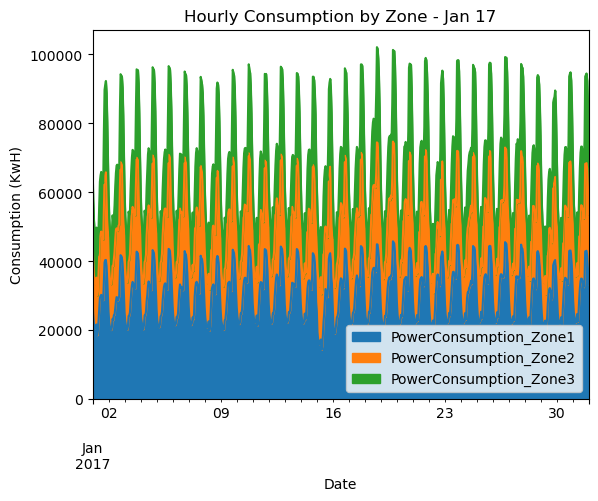

In [8]:
jan17_consumption.plot.area(
    title='Hourly Consumption by Zone - Jan 17',
    xlabel='Date',
    ylabel='Consumption (KwH)'
)

### Objective 3

In [9]:
#create a pivot table: row = dayofweek, col = hourofweek, avg_consumption

''

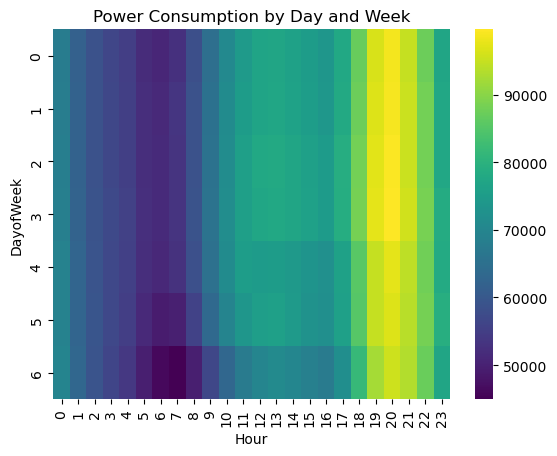

In [10]:
sns.heatmap(power_consumption_data.pivot_table(
    values='TotalConsumption',
    index=['DayofWeek'], #index represent row
    columns=['Hour'],
    aggfunc='mean'
).round(4),
cbar=True, # Optional
    cmap='viridis',
    ).set(title='Power Consumption by Day and Week')

;

In [39]:
# Ensure the 'Datetime' column is in datetime format
power_consumption_data['Datetime'] = pd.to_datetime(power_consumption_data['Datetime'])

# Extract day names
power_consumption_data['DayName'] = power_consumption_data['Datetime'].dt.day_name()

# Define the custom order of days
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a categorical column with the custom order
power_consumption_data['DayName'] = pd.Categorical(power_consumption_data['DayName'], categories=days_of_week, ordered=True)

# Display the result
print(power_consumption_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   PowerConsumption_Zone1  52416 non-null  float64       
 2   PowerConsumption_Zone2  52416 non-null  float64       
 3   PowerConsumption_Zone3  52416 non-null  float64       
 4   TotalConsumption        52416 non-null  float64       
 5   Hour                    52416 non-null  int32         
 6   Date                    52416 non-null  object        
 7   Time                    52416 non-null  object        
 8   DayofWeek               52416 non-null  int32         
 9   DayName                 52416 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(4), int32(2), object(2)
memory usage: 3.2+ MB
None


''

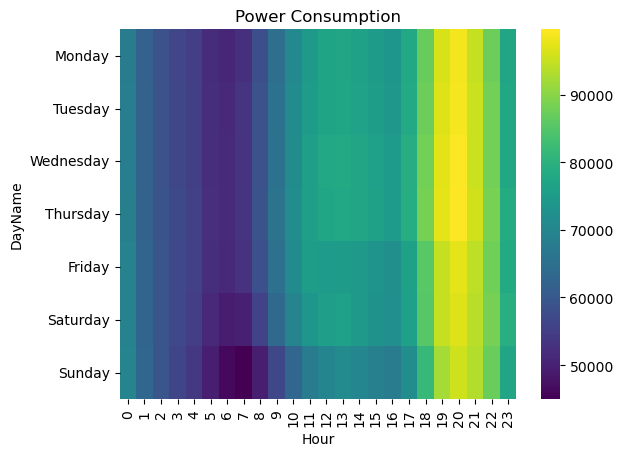

In [40]:
sns.heatmap(
    power_consumption_data.pivot_table(
    values='TotalConsumption',
    index=['DayName'], #index represent row
    columns=['Hour'],
    aggfunc='mean'
),cbar=True, cmap='viridis').set(title='Power Consumption')
;

In [41]:
power_consumption_data.pivot_table(
    values='TotalConsumption',
    index=['DayName'], #index represent row
    columns=['Hour'],
    aggfunc='mean'
)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayName,,,,,,,,,,,,,,,,,,,,,
Monday,67817.926234,61755.422717,58647.360270,56399.125350,54823.472531,51680.112788,50810.531813,52647.477122,58153.995604,64829.891067,...,76295.125575,74951.160542,73672.590199,77737.724117,87015.319529,96344.104726,98636.766753,94795.229937,87444.628027,77141.248435
Tuesday,67935.356547,61868.544847,58801.200586,56642.907327,55088.146346,52165.725002,51320.086009,53314.431143,58788.751316,65473.069281,...,76564.586378,75151.608847,73866.089284,78034.431306,87425.955170,96812.639776,98951.522986,95247.295786,88105.205865,77583.710692
Wednesday,68239.842528,62022.724317,58798.761412,56626.703787,55114.497390,52157.866552,51411.322040,53186.989913,58830.511611,65583.730610,...,77084.718564,75799.737721,74690.144168,78963.032971,88010.877872,97121.892997,99259.106506,95347.105487,87966.060059,77526.249785
Thursday,68293.632675,62187.544469,59063.328906,56958.133058,55465.004964,52336.590999,51408.387710,53305.035278,58985.960718,65850.016097,...,77129.099508,76024.015184,74771.523732,78859.415340,88130.713827,97361.509809,99639.276059,95745.056611,88461.996304,78369.942328
Friday,68959.251459,62533.960861,59152.040758,56825.429786,55296.351259,52178.788896,51156.640309,52771.135698,58250.443622,65179.083324,...,74344.497887,73169.524043,72295.790052,76172.341277,85512.967870,94802.624915,97380.905756,94232.932202,87846.655100,78259.646904
Saturday,68991.576226,62628.416936,59321.825090,56745.339022,54816.778024,51275.831269,49144.134609,49769.161118,55718.168776,63423.248858,...,74654.603723,72910.123153,71972.130743,75921.019762,85309.097439,94902.067927,96852.132434,93754.497597,88284.551471,79287.720731
Sunday,69728.136464,63113.302575,59243.071267,56207.553656,53896.627602,49677.139543,46078.167596,44983.099866,49619.256706,56571.380742,...,70039.555630,68585.463342,67570.378727,71844.793038,81580.676389,92171.105678,95540.060279,93301.028513,87069.268851,77031.733676
